In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn. compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score 

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
import scipy 
from scipy import stats
from scipy.stats import uniform, randint


In [4]:
data = pd.read_csv(r'../data/loan_approval_dataset.csv')
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
data.iloc[200]

loan_id                                201
 no_of_dependents                        4
 education                    Not Graduate
 self_employed                         Yes
 income_annum                      9800000
 loan_amount                      21200000
 loan_term                              20
 cibil_score                           355
 residential_assets_value         22000000
 commercial_assets_value           8900000
 luxury_assets_value              31800000
 bank_asset_value                 14400000
 loan_status                      Rejected
Name: 200, dtype: object

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

### EDA

In [5]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [7]:
data.duplicated().sum()

0

In [8]:
# remove spaces from column names
data.columns = data.columns.str.strip()
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [9]:
numerical_columns=[]
categorical_columns=[]
for i in data.columns:
    if data[i].dtype == 'object':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
    

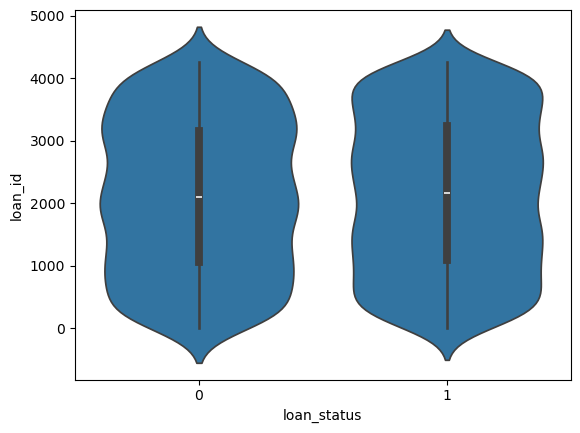

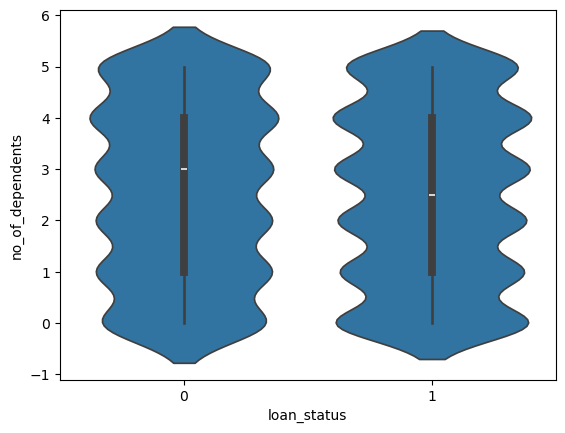

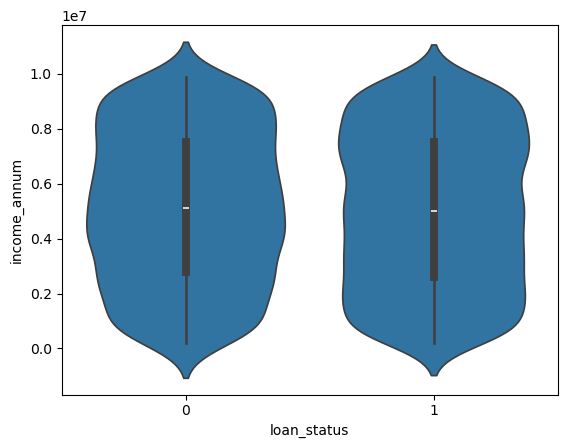

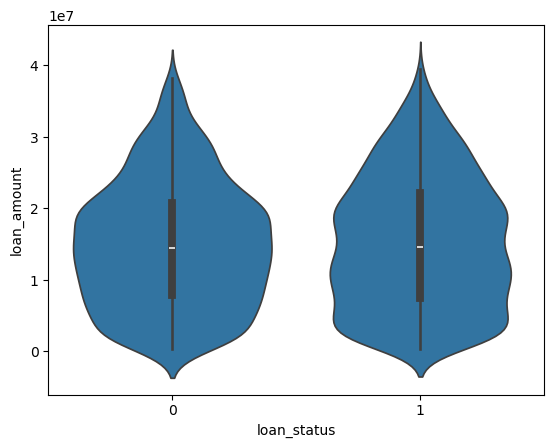

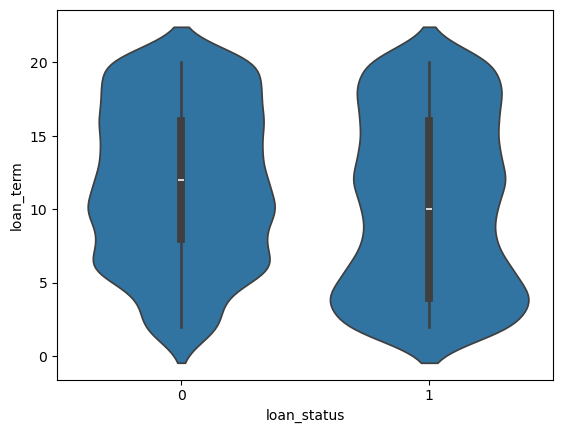

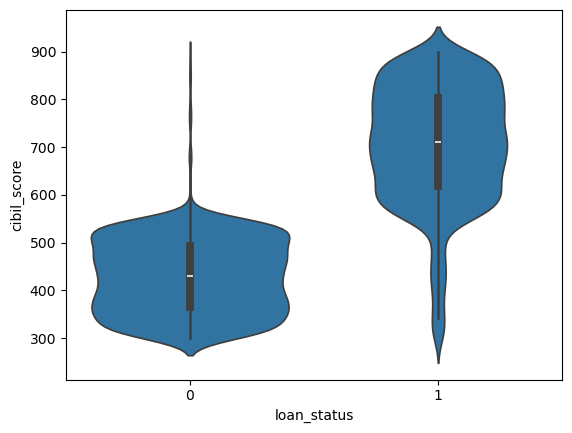

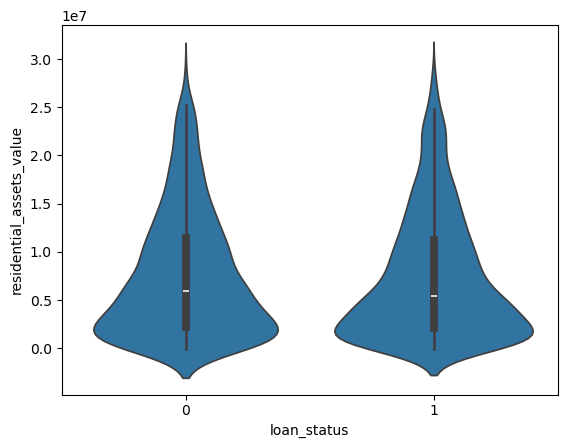

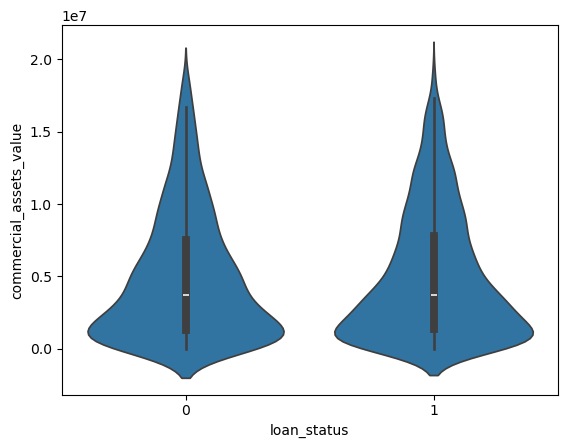

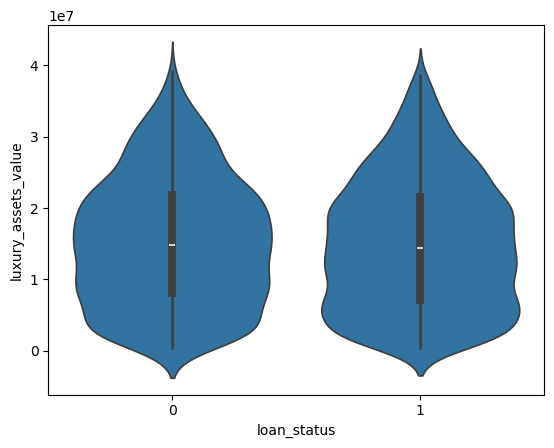

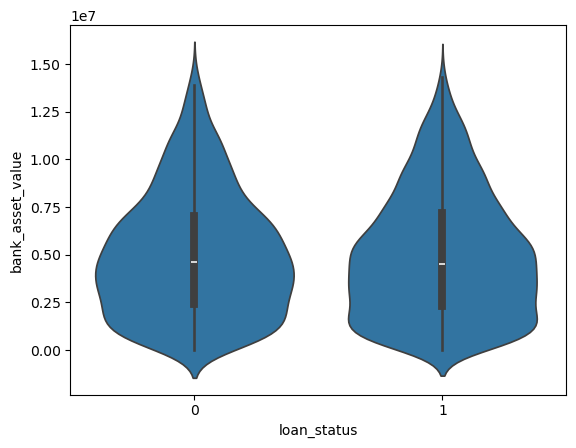

In [76]:
# Violin plot for numerical columns
for num in numerical_columns:
    sns.violinplot(x='loan_status',y= num, data =data)
    plt.show()

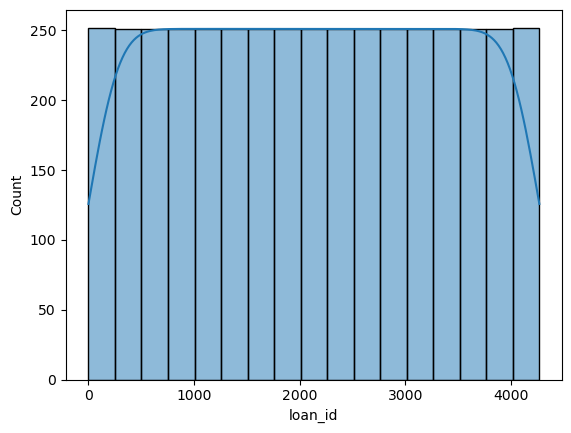

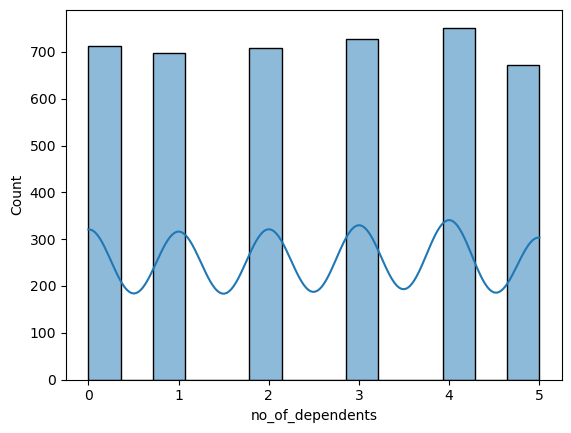

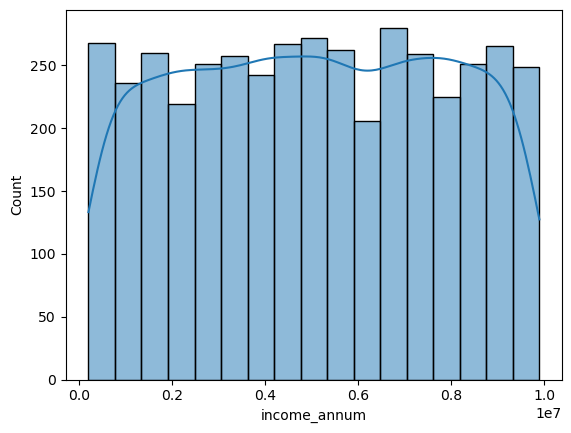

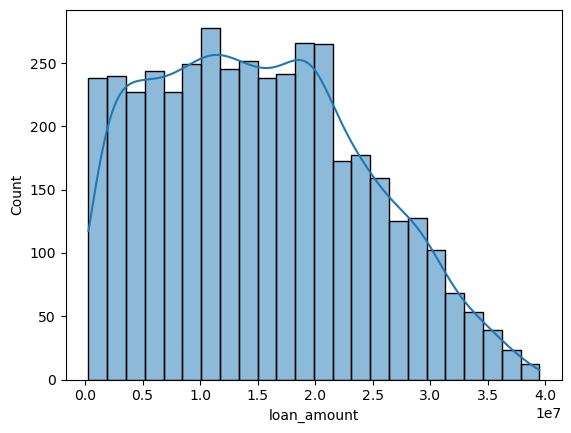

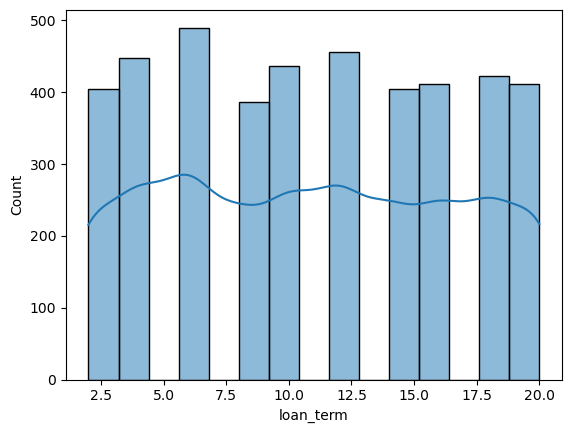

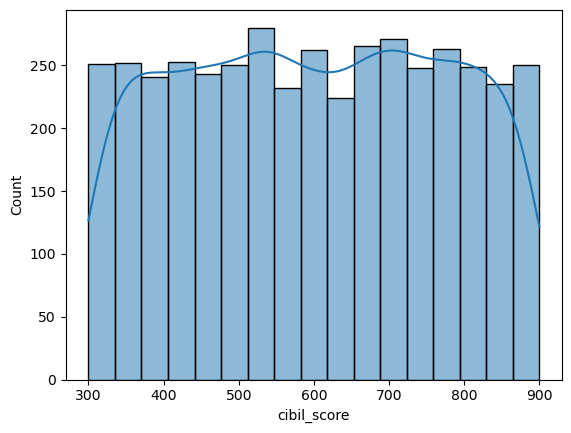

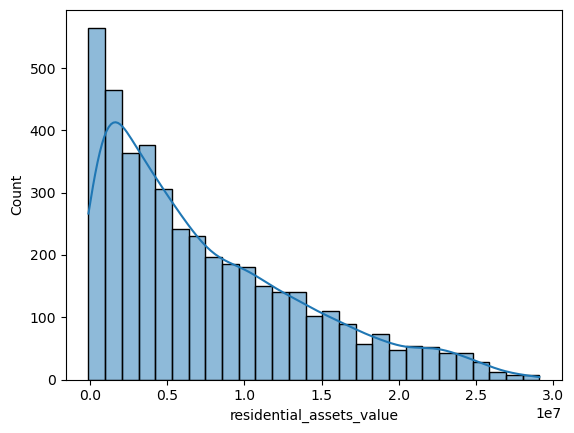

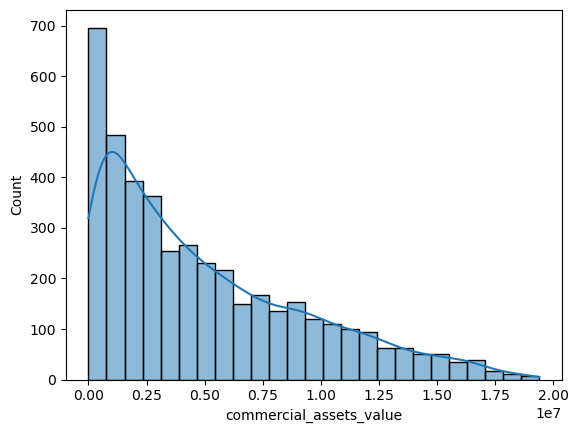

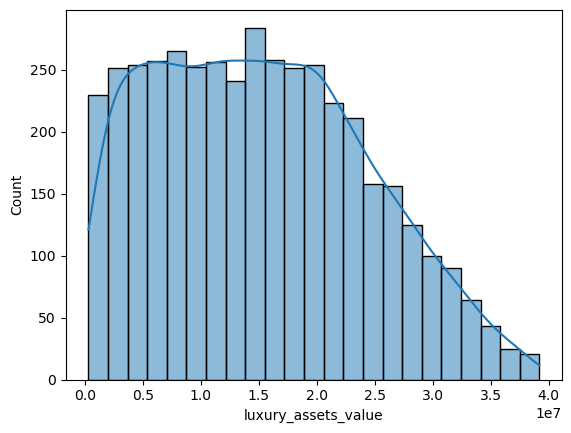

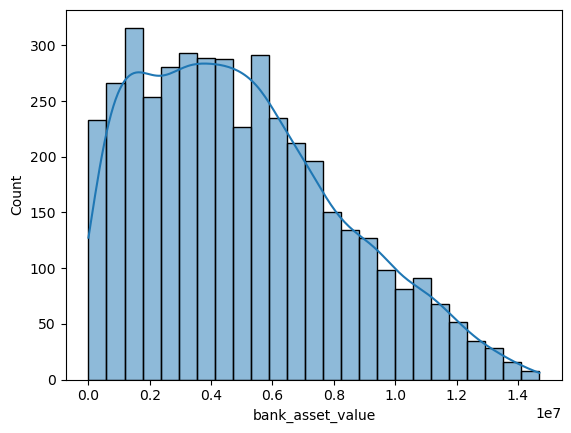

In [81]:
for num in numerical_columns:
    sns.histplot(data[num], label='Train', kde=True)
    plt.show()

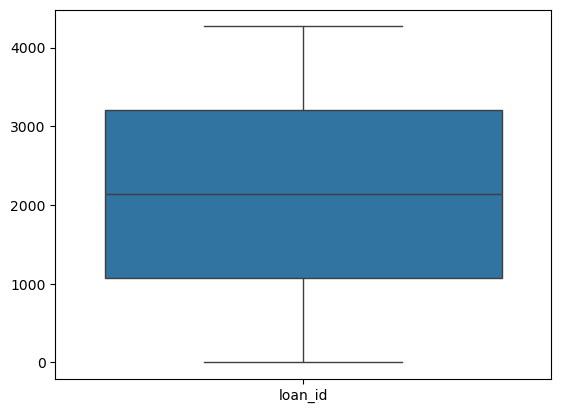

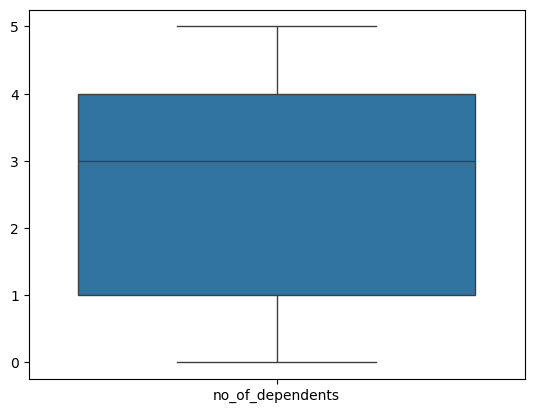

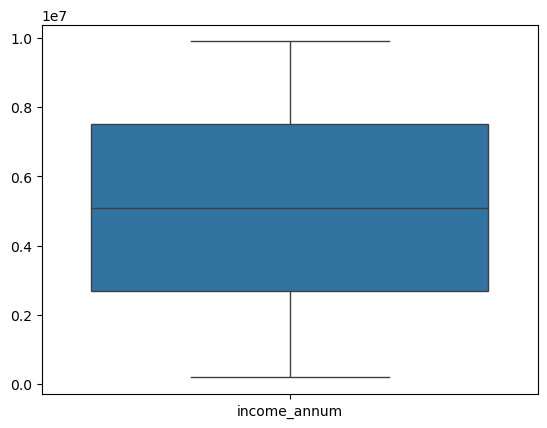

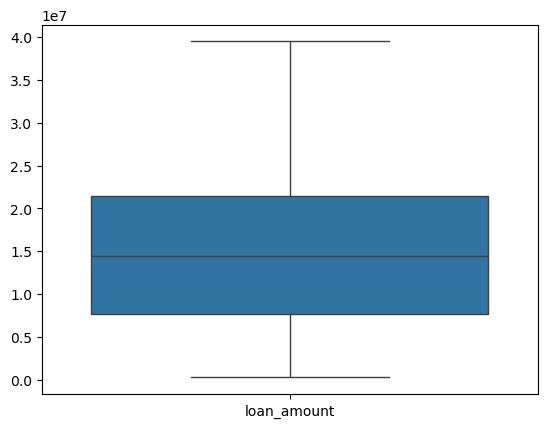

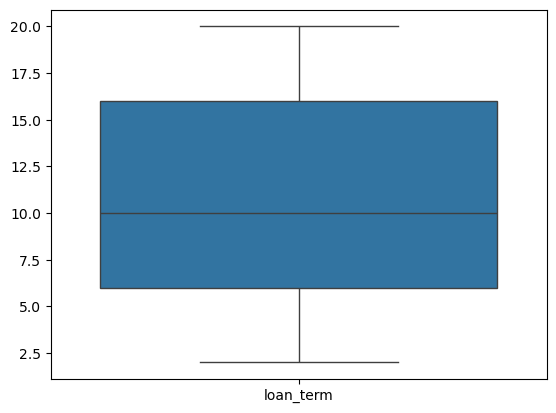

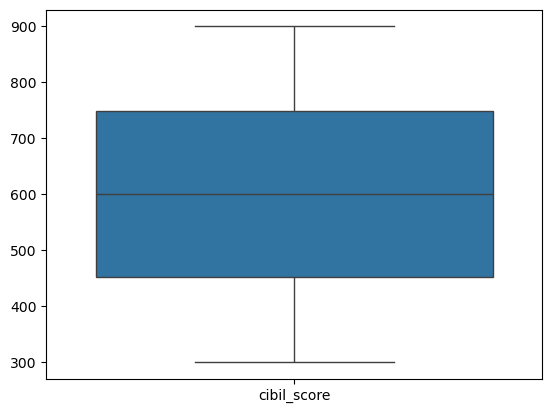

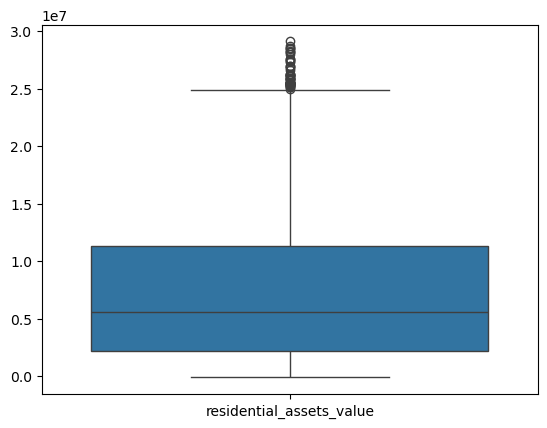

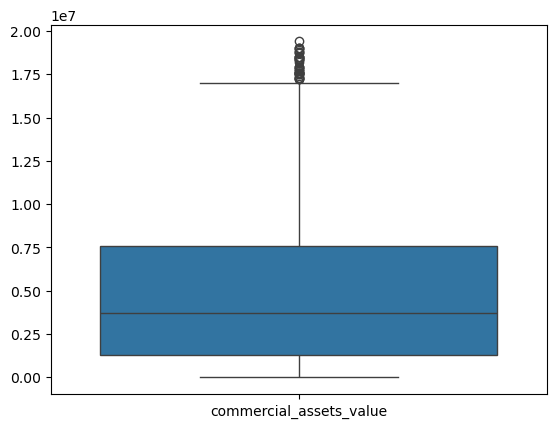

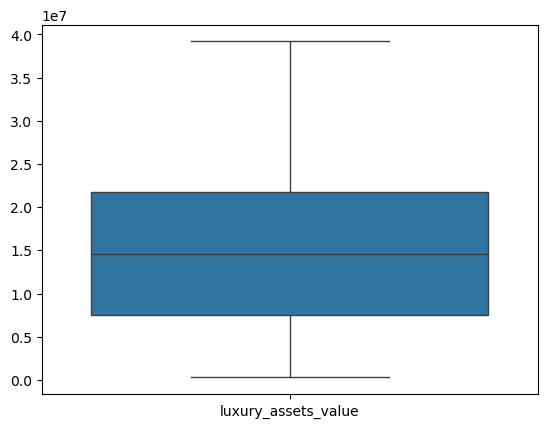

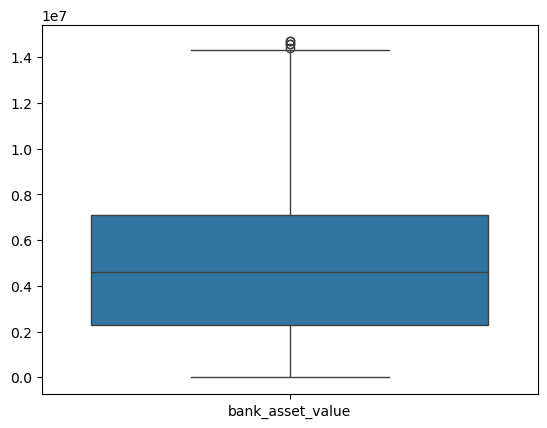

In [82]:
for num in numerical_columns:
    sns.boxplot(data=[data[num]])
    plt.show()

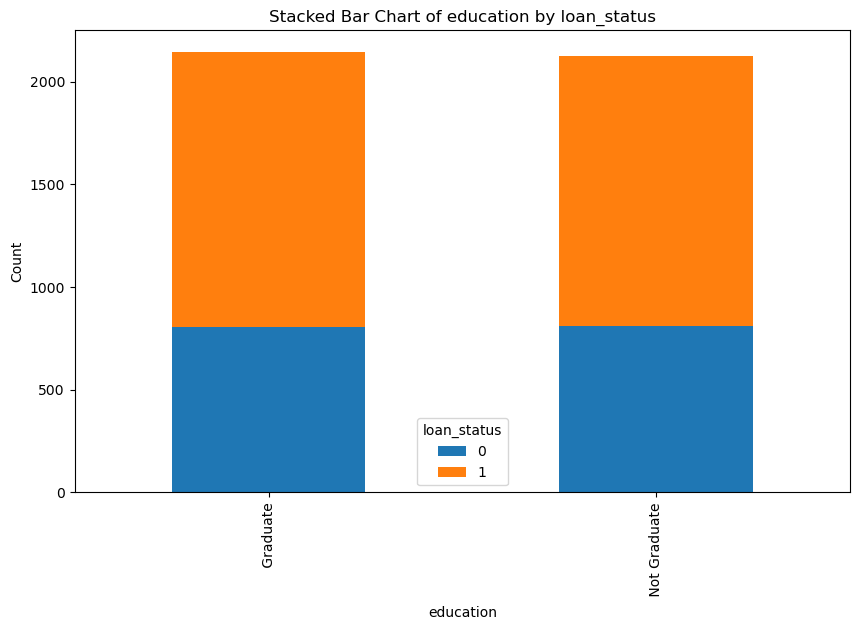

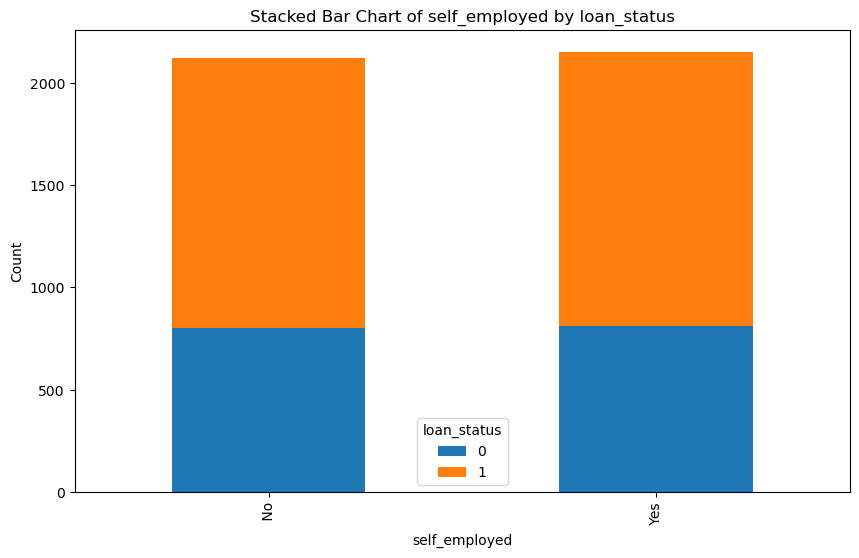

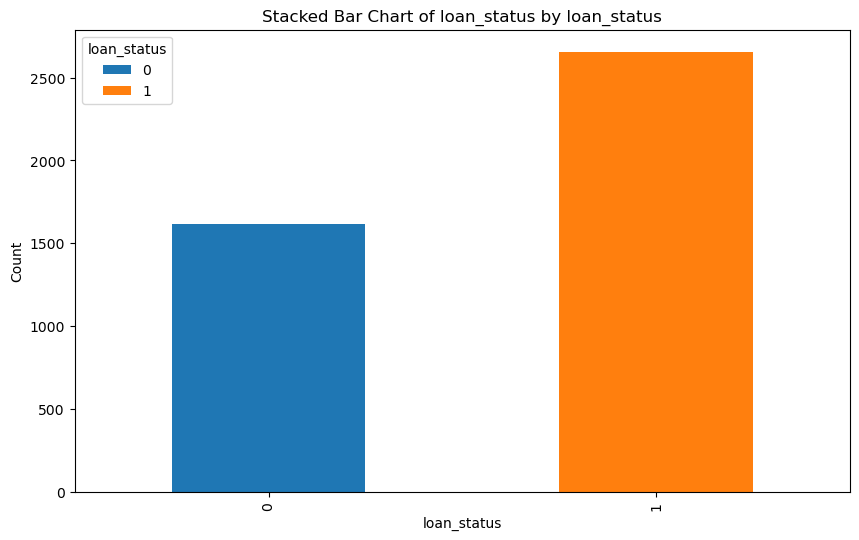

In [80]:
for cat in categorical_columns:
  loan_status_counts = data.groupby([cat, 'loan_status'])['loan_status'].count().unstack()
  loan_status_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
  plt.title(f'Chart of {cat} by loan_status')
  plt.xlabel(cat)
  plt.ylabel('Count')
  plt.show()

In [88]:
# skew_value = data.skew().sort_values(ascending=False)
# skew_value
# remove outlier
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR= Q3-Q1
data=data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

## Feature Engineering

In [11]:
# Preprocessing
# Remove outlier data
# OnehotEncoder
# StandardScaler

In [10]:
data.nunique()

loan_id                     4269
no_of_dependents               6
education                      2
self_employed                  2
income_annum                  98
loan_amount                  378
loan_term                     10
cibil_score                  601
residential_assets_value     278
commercial_assets_value      188
luxury_assets_value          379
bank_asset_value             146
loan_status                    2
dtype: int64

In [11]:
data.loan_status.value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [12]:
data['self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [13]:
data['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [15]:
data['loan_status'].isnull().sum()

0

In [16]:
# label encoding target

data['loan_status']=data['loan_status'].map({' Approved':1, ' Rejected': 0})
# data['self_employed']=data['self_employed'].map({' No':0, ' Yes':1})
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [17]:
# Split the data
y=data['loan_status']
x=data.drop(columns=['loan_id','loan_status'],axis = 1)
x

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [18]:
X=x.copy()
Y=y.copy()

In [19]:
numerical_features = X.select_dtypes(include=['int64']).columns.tolist()
categorical_features=X.select_dtypes(include=['object']).columns.tolist()
categorical_features

['education', 'self_employed']

In [20]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())  
                ])

In [21]:
categorical_transformer=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore')),
                ])

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer,categorical_features)]
                )

In [23]:
preprocessed = preprocessor.fit_transform(X)


In [24]:
all_features=preprocessor.get_feature_names_out()
all_features

array(['num__no_of_dependents', 'num__income_annum', 'num__loan_amount',
       'num__loan_term', 'num__cibil_score',
       'num__residential_assets_value', 'num__commercial_assets_value',
       'num__luxury_assets_value', 'num__bank_asset_value',
       'cat__education_ Graduate', 'cat__education_ Not Graduate',
       'cat__self_employed_ No', 'cat__self_employed_ Yes'], dtype=object)

In [26]:
# col=data.columns
df=pd.DataFrame(preprocessed, columns=all_features)
df

,num__no_of_dependents,num__income_annum,num__loan_amount,num__loan_term,num__cibil_score,num__residential_assets_value,num__commercial_assets_value,num__luxury_assets_value,num__bank_asset_value,cat__education_ Graduate,cat__education_ Not Graduate,cat__self_employed_ No,cat__self_employed_ Yes
0,-0.294102,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,1.0,0.0,1.0,0.0
1,-1.473548,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,0.0,1.0,0.0,1.0
2,0.295621,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,1.0,0.0,1.0,0.0
3,0.295621,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,1.0,0.0,1.0,0.0
4,1.475067,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.475067,-1.446324,-1.419268,0.192617,-1.641063,-0.718546,-1.019301,-1.299210,-1.285213,1.0,0.0,0.0,1.0
4265,-1.473548,-0.626801,-0.423946,1.594031,-0.237434,-0.503257,-0.472412,-0.453306,-0.946732,0.0,1.0,0.0,1.0
4266,-0.294102,0.513405,0.969504,1.243677,-0.829046,-0.964591,1.692361,0.326683,0.714907,0.0,1.0,1.0,0.0
4267,-0.883825,-0.341750,-0.258059,-0.508091,1.044393,0.111856,-0.973727,-0.112748,0.253341,0.0,1.0,1.0,0.0


In [30]:
# train test: pipeline, simpleImpute, ohe, scaler, 
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3415, 13), (854, 13), (3415,), (854,))

In [ ]:
# Train and evaluate different models

Model:  RandomForestClassifier()
Accuracy score: 0.977

Classification Report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854


CM:  [[307  11]
 [  9 527]]


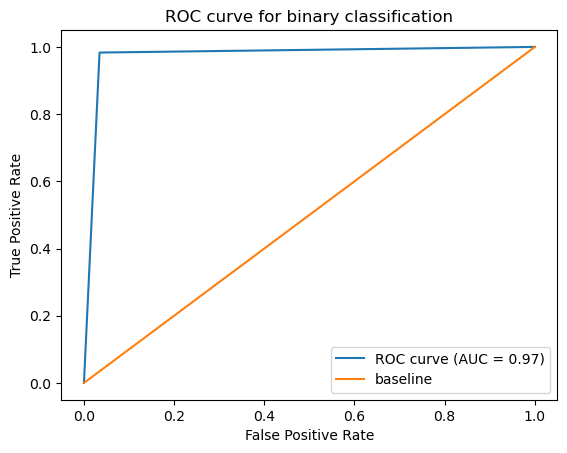

In [33]:
rfc=RandomForestClassifier()
# Fit the model
rfc.fit(X_train, y_train)
# Predict using the best model
y_pred = rfc.predict(X_test)
# Evaluate the model
print('Model: ',rfc)
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.3f}")

print("\nClassification Report:", classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

Model:  DecisionTreeClassifier()
Accuracy score: 0.977

Classification Report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



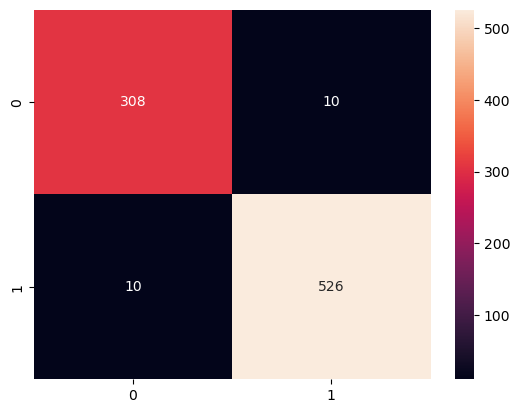


CM:  [[308  10]
 [ 10 526]]


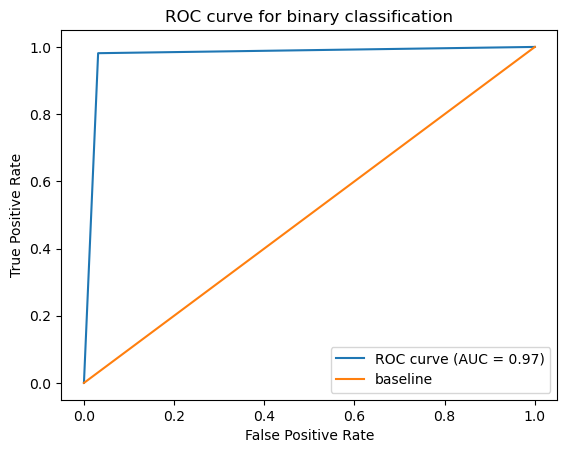

In [35]:
dt=DecisionTreeClassifier()
# Fit the model
dt.fit(X_train, y_train)
# Predict using the best model
y_pred = dt.predict(X_test)
# Evaluate the model
print('Model: ',dt)
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:", classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

Model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy score: 0.982

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy            

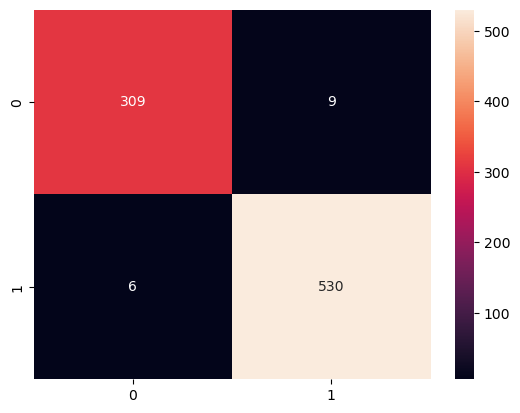

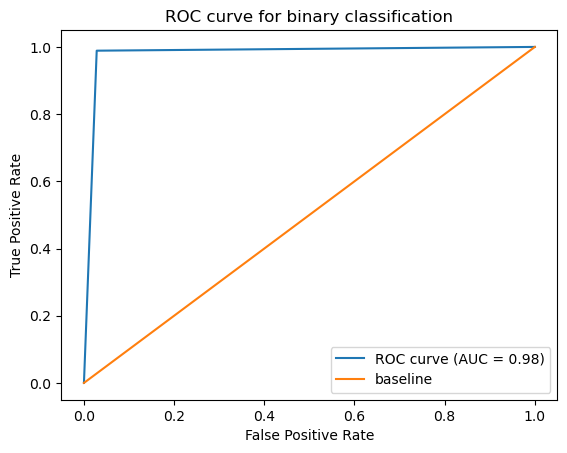

In [36]:
xgb=XGBClassifier()
# Fit the model
xgb.fit(X_train, y_train)
# Predict using the best model
y_pred = xgb.predict(X_test)
# Evaluate the model
print('Model: ',xgb)
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:", classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

Model:  BaggingClassifier()
Accuracy score: 0.978

Classification Report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



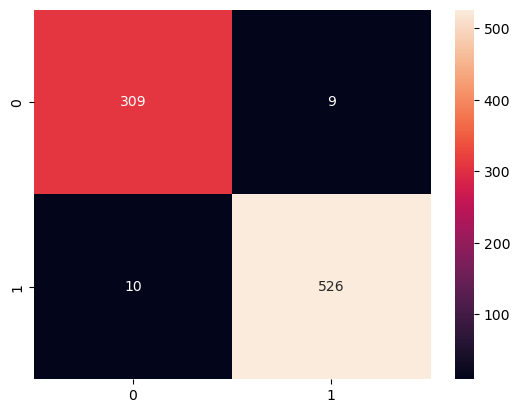

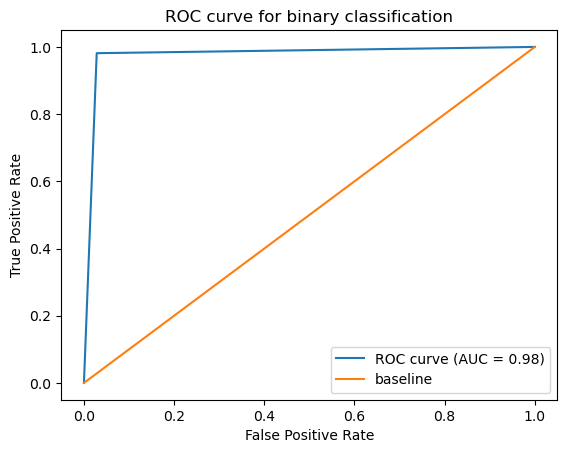

In [37]:
bgc=BaggingClassifier()
# Fit the model
bgc.fit(X_train, y_train)
# Predict using the best model
y_pred = bgc.predict(X_test)
# Evaluate the model
print('Model: ',bgc)
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:", classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

In [57]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Evaluate the model
  print(f"\n{model_name} Model:")
  accuracy=accuracy_score(y_test, y_pred)
  print(f"Accuracy score:, {accuracy_score(y_test, y_pred):.3f}")
  roc_auc = roc_auc_score(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)
    
  # Visualize confusion matrix
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, annot=True, fmt='g')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()
  print(f"ROC AUC: {roc_auc}")
  print(f"Classification Report:\n{class_report}")

  # Visualize ROC AUC
  y_pred_proba = model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC AUC for {model_name} Model')
  plt.legend(loc="lower right")
  plt.show()

  return accuracy, roc_auc
    

In [58]:
# Train and evaluate different models

models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(),
    
}


Random Forest Model:
Accuracy score:, 0.980


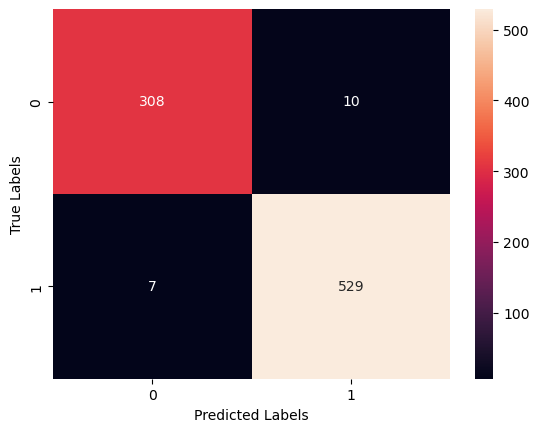

ROC AUC: 0.9777468788134798
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



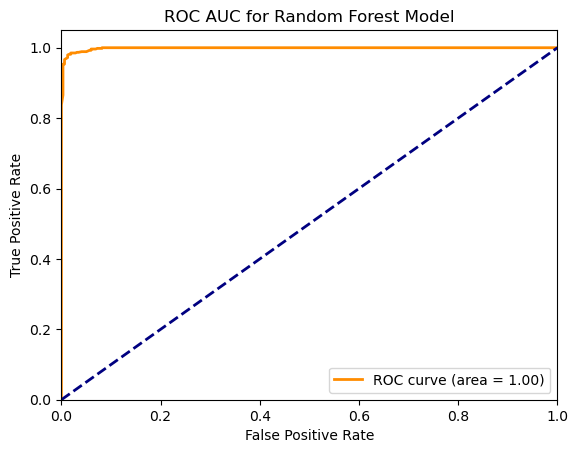


Decision Tree Model:
Accuracy score:, 0.972


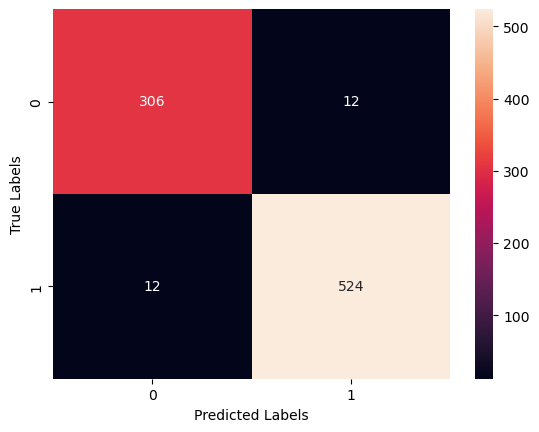

ROC AUC: 0.9699380456209519
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       318
           1       0.98      0.98      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



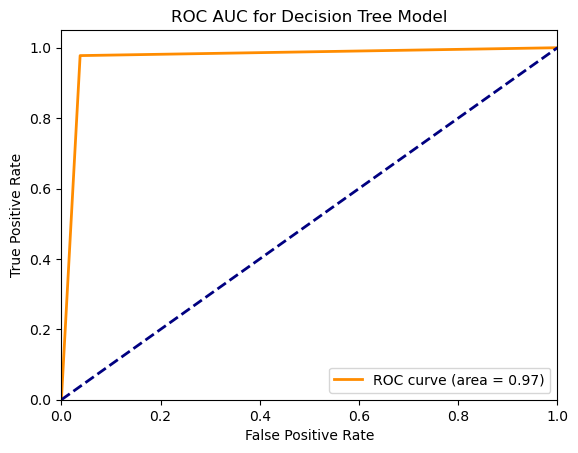


XGBoost Model:
Accuracy score:, 0.982


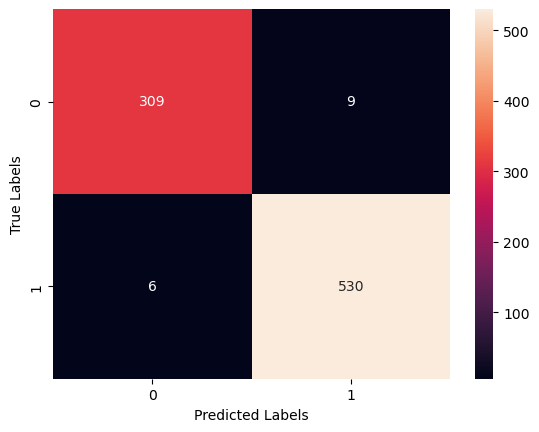

ROC AUC: 0.9802520416784005
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



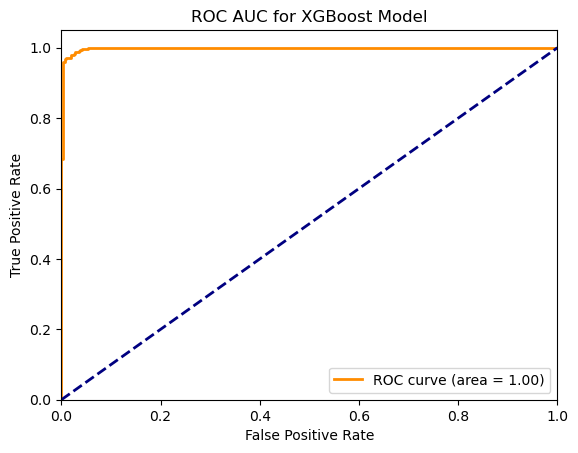


Bagging Classifier Model:
Accuracy score:, 0.981


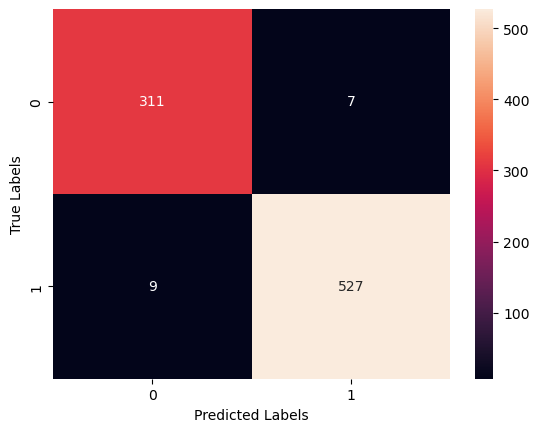

ROC AUC: 0.9805981883037643
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       318
           1       0.99      0.98      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



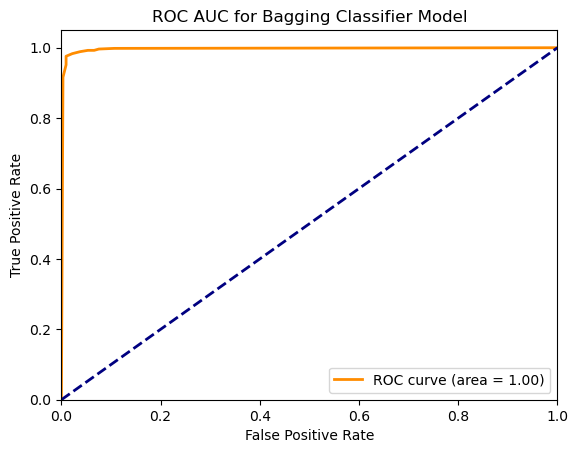

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2120, number of negative: 1295
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1455
[LightGBM] [Info] Number of data points in the train set: 3415, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.620791 -> initscore=0.492905
[LightGBM] [Info] Start training from score 0.492905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

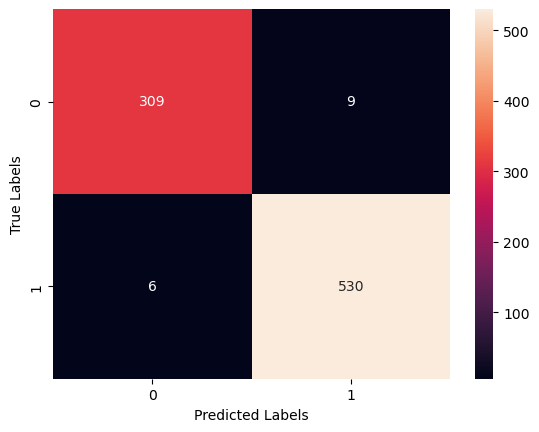

ROC AUC: 0.9802520416784005
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



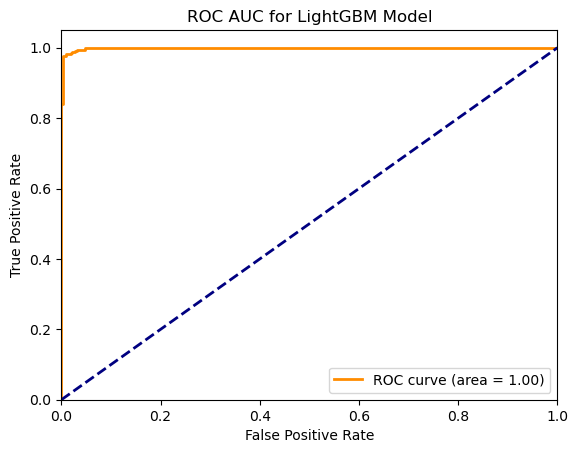

Learning rate set to 0.017406
0:	learn: 0.6517827	total: 183ms	remaining: 3m 3s
1:	learn: 0.6167306	total: 199ms	remaining: 1m 39s
2:	learn: 0.5807508	total: 210ms	remaining: 1m 9s
3:	learn: 0.5502985	total: 219ms	remaining: 54.5s
4:	learn: 0.5215152	total: 230ms	remaining: 45.7s
5:	learn: 0.4929095	total: 237ms	remaining: 39.3s
6:	learn: 0.4659441	total: 248ms	remaining: 35.1s
7:	learn: 0.4412537	total: 256ms	remaining: 31.8s
8:	learn: 0.4194504	total: 262ms	remaining: 28.8s
9:	learn: 0.3988141	total: 270ms	remaining: 26.8s
10:	learn: 0.3784667	total: 277ms	remaining: 24.9s
11:	learn: 0.3619453	total: 284ms	remaining: 23.4s
12:	learn: 0.3462831	total: 290ms	remaining: 22s
13:	learn: 0.3302849	total: 296ms	remaining: 20.8s
14:	learn: 0.3142859	total: 302ms	remaining: 19.8s
15:	learn: 0.3000637	total: 308ms	remaining: 18.9s
16:	learn: 0.2879106	total: 314ms	remaining: 18.2s
17:	learn: 0.2764102	total: 320ms	remaining: 17.5s
18:	learn: 0.2636114	total: 327ms	remaining: 16.9s
19:	learn: 0

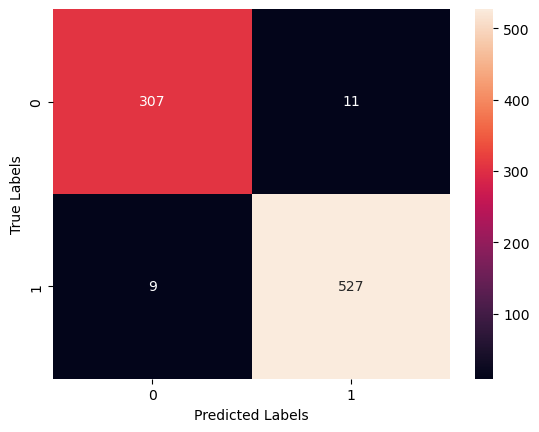

ROC AUC: 0.9743088801276636
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



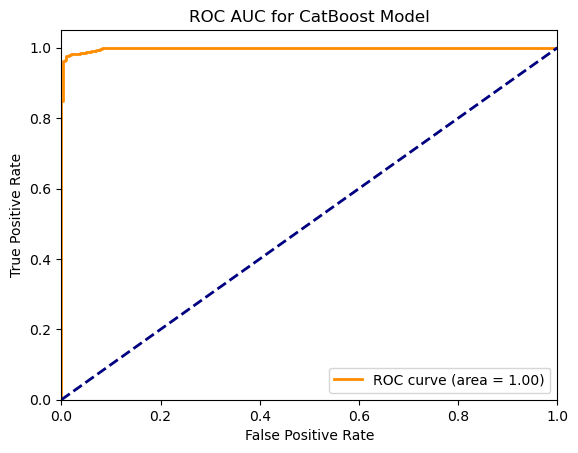

In [59]:
results = {}

for model_name, model in models.items():
  accuracy, roc_auc = train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name)
  results[model_name] = {"accuracy": accuracy, "roc_auc": roc_auc}

Best parameters found: {'colsample_bytree': 0.6341389859975072, 'gamma': 0.2584086058430385, 'learning_rate': 0.1694063894704444, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 360, 'reg_alpha': 0.13835309241780136, 'reg_lambda': 0.1327454222429698, 'subsample': 0.9878147468456636}
Accuracy score: 0.978

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



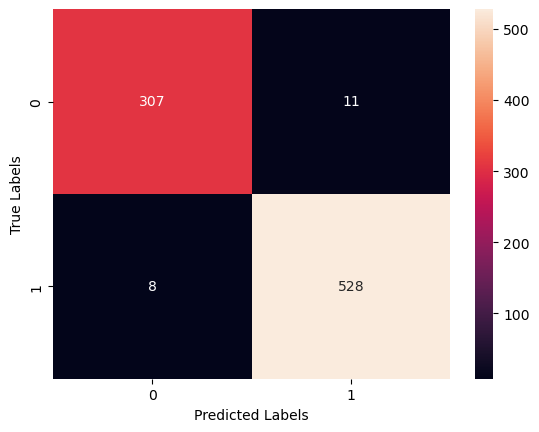

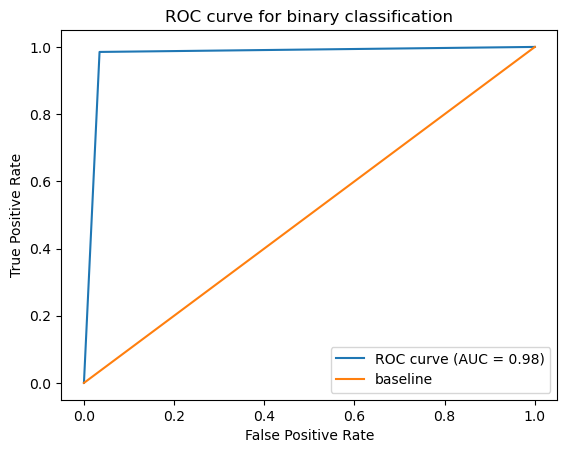

In [75]:
# Initialize the XGBClassifier
xgb_classifier = XGBClassifier(random_state=42)

# Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(2, 10),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best estimator
best_model = random_search.best_estimator_
print(f"Best parameters found: {random_search.best_params_}")

# Predict using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()    

In [69]:
# see improve with smote
sm=SMOTE()
x_sm, y_sm =sm.fit_resample(df, y)
# x_sm
# y.ravel()

In [71]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)
X_train_sm.shape, X_test_sm.shape, y_train_sm.shape, y_test_sm.shape

((4249, 13), (1063, 13), (4249,), (1063,))

In [72]:
models_v1 = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
}


Random Forest Model:
Accuracy score:, 0.981


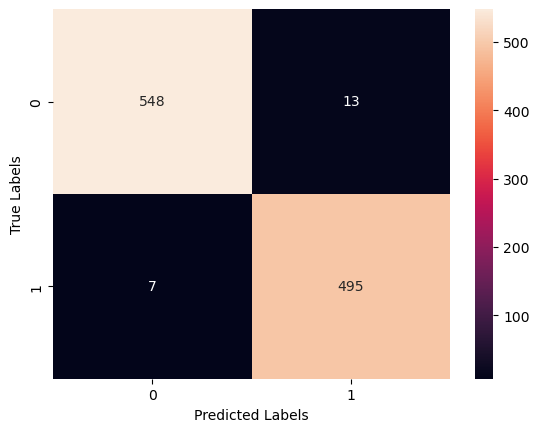

ROC AUC: 0.9814414356832918
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       561
           1       0.97      0.99      0.98       502

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063



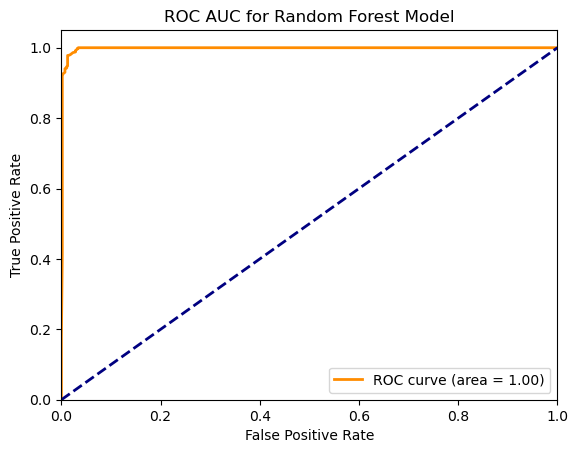


Decision Tree Model:
Accuracy score:, 0.969


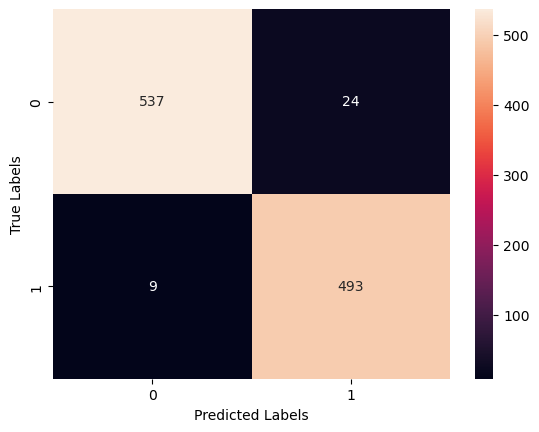

ROC AUC: 0.9696454822421544
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       561
           1       0.95      0.98      0.97       502

    accuracy                           0.97      1063
   macro avg       0.97      0.97      0.97      1063
weighted avg       0.97      0.97      0.97      1063



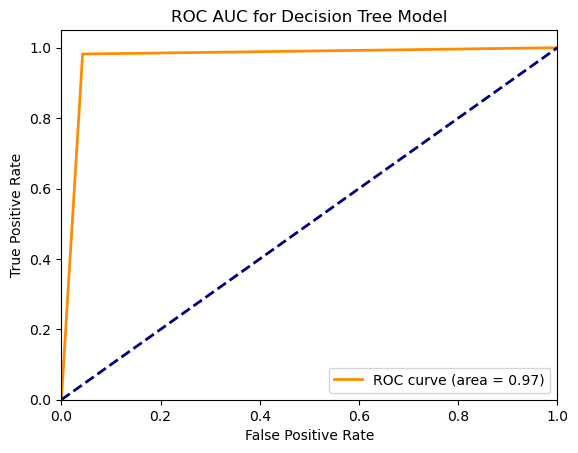


XGBoost Model:
Accuracy score:, 0.986


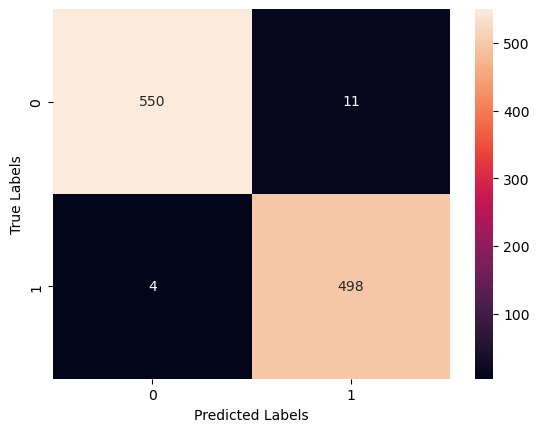

ROC AUC: 0.9862120146863526
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       561
           1       0.98      0.99      0.99       502

    accuracy                           0.99      1063
   macro avg       0.99      0.99      0.99      1063
weighted avg       0.99      0.99      0.99      1063



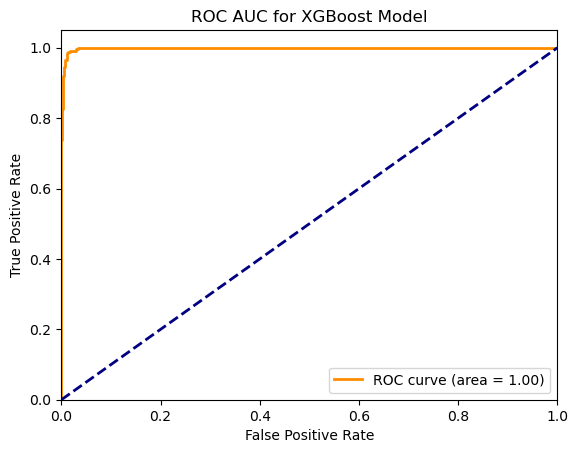

In [73]:
results_v1 = {}

for model_name, model in models_v1.items():
  accuracy, roc_auc = train_and_evaluate(model, X_train_sm, X_test_sm, y_train_sm, y_test_sm, model_name)
  results_v1[model_name] = {"accuracy": accuracy, "roc_auc": roc_auc}

Best parameters found: {'colsample_bytree': 0.7334834444556088, 'gamma': 0.7143340896097039, 'learning_rate': 0.20526654188465587, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 393, 'reg_alpha': 0.8324426408004217, 'reg_lambda': 0.21233911067827616, 'subsample': 0.6727299868828402}
Accuracy score: 0.980

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       561
           1       0.97      0.99      0.98       502

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063



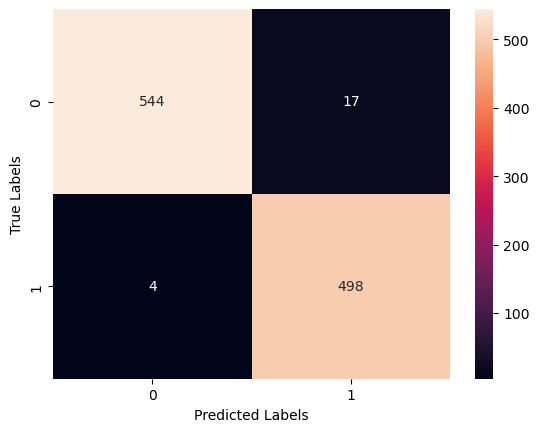

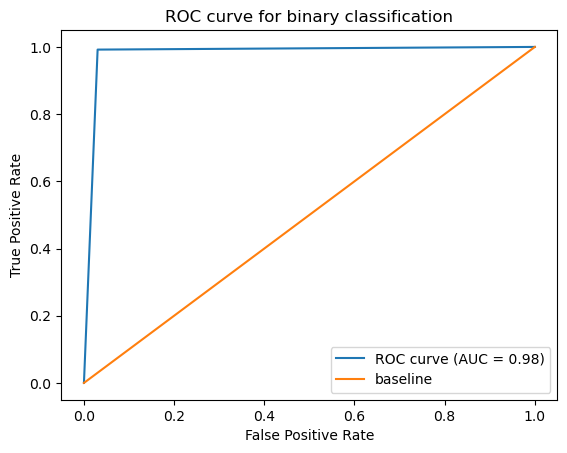

In [74]:
# Initialize the XGBClassifier
xgb_classifier = XGBClassifier(random_state=42)

# Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(2, 10),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_sm, y_train_sm)

# Best estimator
best_model = random_search.best_estimator_
print(f"Best parameters found: {random_search.best_params_}")

# Predict using the best model
y_pred = best_model.predict(X_test_sm)

# Evaluate the model
print(f"Accuracy score: {accuracy_score(y_test_sm, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test_sm, y_pred))

cm=confusion_matrix(y_test_sm,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_sm, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()    

In [94]:
X_train_xx, X_test_xx, y_train_xx, y_test_xx = train_test_split(xx_df, yy, test_size=0.2, random_state=42)
X_train_xx.shape, X_test_xx.shape, y_train_xx.shape, y_test_xx.shape

((3415, 13), (854, 13), (3415,), (854,))


Random Forest Model:
Accuracy score:, 0.985


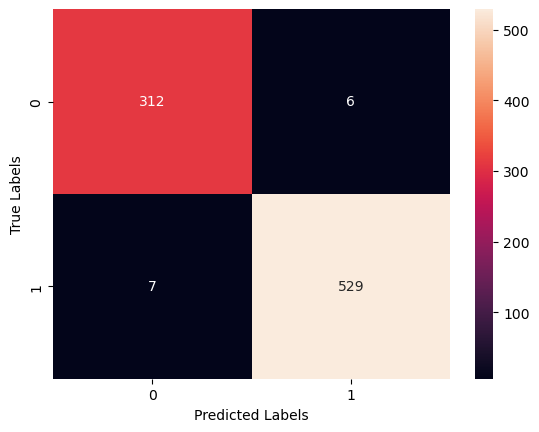

ROC AUC: 0.9840361869895804
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       318
           1       0.99      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



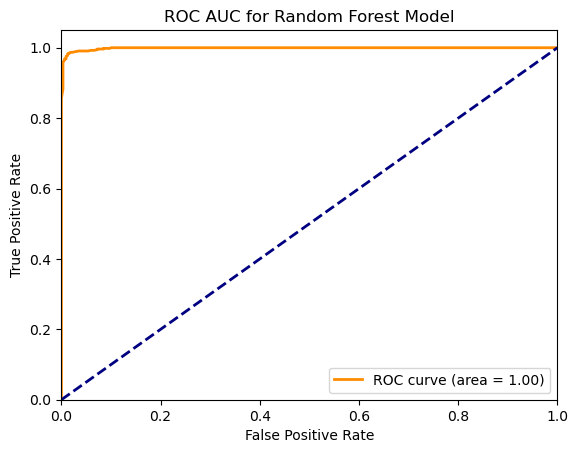


Decision Tree Model:
Accuracy score:, 0.973


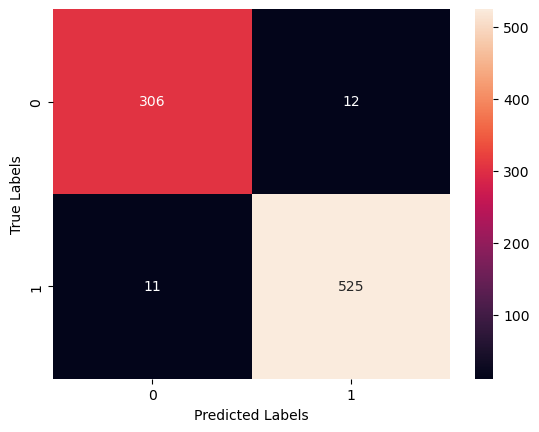

ROC AUC: 0.9708708814418474
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       318
           1       0.98      0.98      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



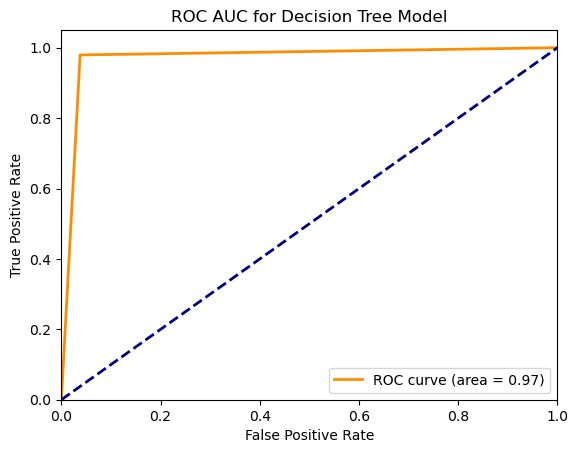


XGBoost Model:
Accuracy score:, 0.982


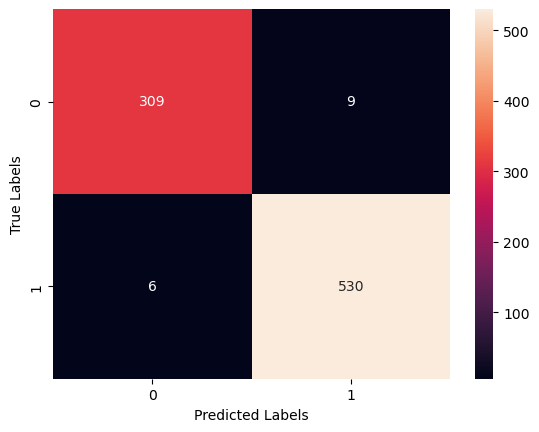

ROC AUC: 0.9802520416784005
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



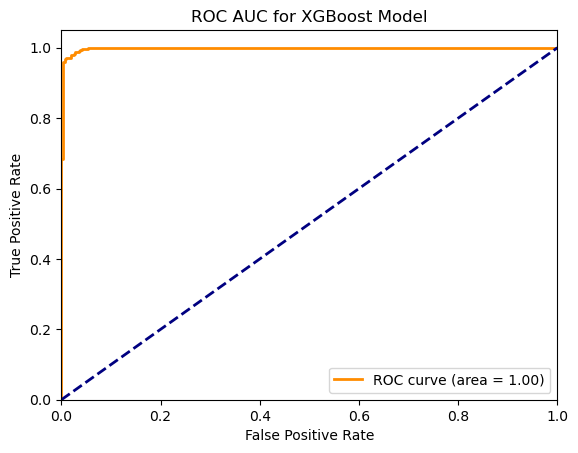

In [95]:
results_xx = {}

for model_name, model in models_v1.items():
  accuracy, roc_auc = train_and_evaluate(model, X_train_xx, X_test_xx, y_train_xx, y_test_xx, model_name)
  results_xx[model_name] = {"accuracy": accuracy, "roc_auc": roc_auc}